Generate figures for large model ensemble

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
from fair.SSPs import ssp585 # import one SSP just for time series

In [4]:
SSP_585 = ssp585.Emissions.emissions

In [6]:
# load the remote ensemble

T = np.load('../FAIR-master/remote_runs_NOx/Temperature_prior_remote.npy')
T_constrained = np.load('../FAIR-master/remote_runs_NOx/Temperature_post_remote.npy')

In [7]:
nt = T_constrained.shape[0]

T_mean = T.mean(axis=1)
T_5th = np.percentile(T, 5, axis=1)
T_50th = np.percentile(T, 50, axis=1)
T_95th = np.percentile(T, 95, axis=1)

T_constrained_mean = T_constrained.mean(axis=1)
T_constrained_5th = np.percentile(T_constrained, 5, axis=1)
T_constrained_50th = np.percentile(T_constrained, 50, axis=1)
T_constrained_95th = np.percentile(T_constrained, 95, axis=1)

In [9]:
import xarray as xr

ds = xr.open_dataset('../FAIR-master/HadCRUT_series_global_annual.nc')
Historical_obs = ds.to_dataframe()

T_obs = np.array(ds['tas_mean'])
T_obs_mean = T_obs[1961-1850:1990-1850].mean()
T_obs_mean_2 = T_obs[0:1900-1850].mean()

T_obs_2 = T_obs-T_obs_mean_2

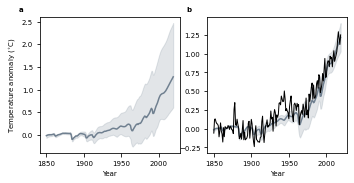

In [15]:
plt.rcParams['figure.figsize'] = (5.5,2.5)
plt.rcParams.update({'font.size': 7})

fig=plt.figure()

ax1 = fig.add_subplot(121)

ax1.plot(SSP_585[1850-1765:nt,0], T_50th[1850-1765:], color='slategray')

ax1.fill_between(SSP_585[1850-1765:nt,0], T_5th[1850-1765:], T_95th[1850-1765:], alpha=0.2, color='slategray')
# ax1.axvline(x=SSP_585[256,0])
ax1.set_ylabel('Temperature anomaly ($^{\circ}$C)')

ax2 = fig.add_subplot(122)
ax2.plot(SSP_585[1850-1765:nt,0], T_constrained_50th[1850-1765:], color='slategray')

ax2.fill_between(SSP_585[1850-1765:nt,0], T_constrained_5th[1850-1765:], T_constrained_95th[1850-1765:], alpha=0.2, color='slategray')
ax2.plot(SSP_585[1850-1765:2020-1765,0], T_obs_2[:2020-1850], linewidth=1, color='black')
# ax1.axvline(x=SSP_585[256,0])

ax1.set_xlabel('Year')
ax2.set_xlabel('Year')

ax1.text(-0.15, 1.04, 'a', transform=ax1.transAxes, 
            size=7, weight='bold')
ax2.text(-0.15, 1.04, 'b', transform=ax2.transAxes, 
            size=7, weight='bold')
plt.savefig('../FAIR-master/remote_runs_NOx/Figures/Small_figures/Ensemble_FigureE1.pdf', bbox_inches='tight');

Compare the priors (distributions of each variable) with the posteriors for forcing variables derived from the Bayesian method

In [12]:
C_constrained = np.load('../FAIR-master/remote_runs_NOx/Concentrations_post_remote.npy')

In [31]:
C_constrained.shape

print(np.percentile(C_constrained[2018-1765,0,:], 50)) # 2018 CO2 concentration

411.076089991462


In [17]:
import seaborn as sns

In [14]:
F = np.load('../FAIR-master/remote_runs_NOx/Forcings_prior_remote.npy')
F_constrained = np.load('../FAIR-master/remote_runs_NOx/Forcings_post_remote.npy')

In [15]:
F = F - F[0,:,:]
F_constrained = F_constrained - F_constrained[0,:,:]

In [16]:
ne = F.shape[2]
ne

300000

In [19]:
nc = F_constrained.shape[2]
nc

6729

In [20]:
from scipy import stats

In [21]:
# re-create the prior distributions of forcing parameters as they are used in the large ensemble

CO2_95 = np.array([1.89, 2.15, 2.41])
CH4_95 = np.array([0.43, 0.54, 0.65])
N2O_95 = np.array([0.16, 0.19, 0.22])
aerosols_95 = np.array([-0.4, -1.1, -2.0])

CO2_s = (CO2_95[2] - CO2_95[1])/1.65
CH4_s = (CH4_95[2] - CH4_95[1])/1.65
N2O_s = (N2O_95[2] - N2O_95[1])/1.65
aerosols_s = np.abs((aerosols_95[2] - aerosols_95[1])/1.65+(aerosols_95[1] - aerosols_95[0])/1.65)/2

CO2_norm = stats.norm.rvs(size=ne, loc=CO2_95[1], scale=CO2_s, random_state=3970)
CH4_norm = stats.norm.rvs(size=ne, loc=CH4_95[1], scale=CH4_s, random_state=53060)
N2O_norm = stats.norm.rvs(size=ne, loc=N2O_95[1], scale=N2O_s, random_state=1532)
aerosols_norm = np.random.uniform(low=-2.2, high=-0.1, size=ne)

In [26]:
# Upload prior and posterior distributions of each climate parameter

Cml = np.load('../FAIR-master/remote_runs_NOx/Cml_prior_remote.npy')
Cml_constrained = np.load('../FAIR-master/remote_runs_NOx/Cml_post_remote.npy')

Cdeep = np.load('../FAIR-master/remote_runs_NOx/Cdeep_prior_remote.npy')
Cdeep_constrained = np.load('../FAIR-master/remote_runs_NOx/Cdeep_post_remote.npy')

ECS = np.load('../FAIR-master/remote_runs_NOx/ECS_prior_remote.npy')
ECS_constrained = np.load('../FAIR-master/remote_runs_NOx/ECS_post_remote.npy')

TCR = np.load('../FAIR-master/remote_runs_NOx/TCR_prior_remote.npy')
TCR_constrained = np.load('../FAIR-master/remote_runs_NOx/TCR_post_remote.npy')

lam = np.load('../FAIR-master/remote_runs_NOx/lambda_prior_remote.npy')
lam_constrained = np.load('../FAIR-master/remote_runs_NOx/lamda_post_remote.npy')

gam = np.load('../FAIR-master/remote_runs_NOx/gamma_prior_remote.npy')
gam_constrained = np.load('../FAIR-master/remote_runs_NOx/gamma_post_remote.npy')

eps = np.load('../FAIR-master/remote_runs_NOx/epsilon_prior_remote.npy')
eps_constrained = np.load('../FAIR-master/remote_runs_NOx/epsilon_post_remote.npy')

In [22]:
from matplotlib.ticker import FormatStrFormatter

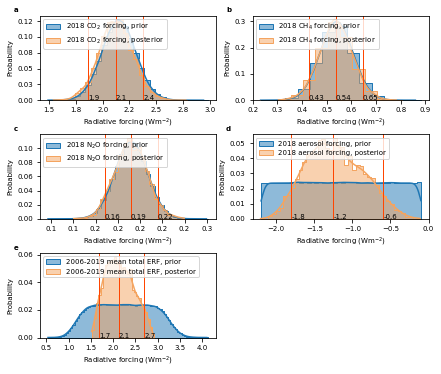

In [63]:
# plt.style.use('seaborn-darkgrid')
# sns.set_style("white")
# sns.set_context("notebook",rc={"font.size":14,"axes.titlesize":14,"axes.labelsize":14})

plt.rcParams['figure.figsize'] = (6.09,5.09)
plt.rcParams.update({'font.size': 7})

fig = plt.figure()
ax1 = fig.add_subplot(321)
ax1.set_xlabel('Radiative forcing (Wm$^{-2}$)')
ax1.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

# sns.distplot(F[253, 0, constrained_2], label='CO2 forcing, constrained')
sns.histplot(x=CO2_norm, stat='probability', kde=True, binwidth=0.05, element='step', alpha=0.5, label='2018 CO$_2$ forcing, prior')
sns.histplot(x=F_constrained[253, 0], stat='probability', kde=True, binwidth=0.05, element='step', color='sandybrown', alpha=0.5, label='2018 CO$_2$ forcing, posterior')

ax2 = fig.add_subplot(322)
sns.histplot(x=CH4_norm, stat='probability', kde=True, binwidth=0.05, element='step', alpha=0.5, label='2018 CH$_4$ forcing, prior')
sns.histplot(x=F_constrained[253, 1], stat='probability', kde=True, binwidth=0.05, element='step', color='sandybrown', alpha=0.5, label='2018 CH$_4$ forcing, posterior')

ax2.set_xlabel('Radiative forcing (Wm$^{-2}$)')

ax3 = fig.add_subplot(323)
sns.histplot(N2O_norm, stat='probability', kde=True, binwidth=0.005, element='step', alpha=0.5, label='2018 N$_2$O forcing, prior')
sns.histplot(F_constrained[253, 2], stat='probability', kde=True, binwidth=0.005, element='step', color='sandybrown', alpha=0.5, label='2018 N$_2$O forcing, posterior')
ax3.set_xlabel('Radiative forcing (Wm$^{-2}$)')
ax3.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))

ax4 = fig.add_subplot(324)
sns.histplot(aerosols_norm, stat='probability', kde=True, binwidth=0.05, element='step', alpha=0.5, label='2018 aerosol forcing, prior')
sns.histplot(F_constrained[253, 8], stat='probability', kde=True, binwidth=0.05, element='step', color='sandybrown', alpha=0.5, label='2018 aerosol forcing, posterior')

ax4.set_xlabel('Radiative forcing (Wm$^{-2}$)')

ax5 = fig.add_subplot(325)
sns.histplot(np.sum(F_baseline, axis=0), stat='probability', kde=True, binwidth=0.05, element='step', alpha=0.5, label='2006-2019 mean total ERF, prior')
sns.histplot(np.sum(F_baseline_constrained, axis=0), stat='probability', kde=True, binwidth=0.05, element='step', color='sandybrown', alpha=0.5, label='2006-2019 mean total ERF, posterior')

ax5.set_xlabel('Radiative forcing (Wm$^{-2}$)')


ax1.text(-0.15, 1.04, 'a', transform=ax1.transAxes, 
            size=7, weight='bold')
ax2.text(-0.15, 1.04, 'b', transform=ax2.transAxes, 
            size=7, weight='bold')

ax3.text(-0.15, 1.04, 'c', transform=ax3.transAxes, 
            size=7, weight='bold')
ax4.text(-0.15, 1.04, 'd', transform=ax4.transAxes, 
            size=7, weight='bold')

ax5.text(-0.15, 1.04, 'e', transform=ax5.transAxes, 
            size=7, weight='bold')

percentile = [5, 50, 95]

for percent in percentile:
    
    ymin, ymax = plt.ylim()
    ax1.axvline(x=np.percentile(F_constrained[253,0], percent), linewidth=1, color='orangered')  
    ax1.annotate(text=np.round(np.percentile(F_constrained[253,0], percent),1), xy=(np.percentile(F_constrained[253,0], percent), 0))
    
    ax2.axvline(x=np.percentile(F_constrained[253,1], percent), linewidth=1, color='orangered')
    ax2.annotate(text=np.round(np.percentile(F_constrained[253,1], percent),2), xy=(np.percentile(F_constrained[253,1], percent), 0))

    ax3.axvline(x=np.percentile(F_constrained[253,2], percent), linewidth=1, color='orangered')
    ax3.annotate(text=np.round(np.percentile(F_constrained[253,2], percent),2), xy=(np.percentile(F_constrained[253,2], percent), 0))

    ax4.axvline(x=np.percentile(F_constrained[253,8], percent), linewidth=1, color='orangered')
    ax4.annotate(text=np.round(np.percentile(F_constrained[253,8], percent),1), xy=(np.percentile(F_constrained[253,8], percent), 0))

    ax5.axvline(x=np.percentile(np.sum(F_baseline_constrained, axis=0), percent), linewidth=1, color='orangered')
    ax5.annotate(text=np.round(np.percentile(np.sum(F_baseline_constrained, axis=0), percent),1), xy=(np.percentile(np.sum(F_baseline_constrained, axis=0), percent), 0))

ax1.legend(loc='upper left')
ax2.legend(loc='upper left')
ax3.legend(loc='upper left')
ax4.legend(loc='upper left')
ax5.legend(loc='upper left')
#fig.tight_layout(pad=1.25)
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=-0.5)
plt.savefig('../FAIR-master/remote_runs_NOx/Figures/Small_figures/Forcing_FigureE4.pdf');

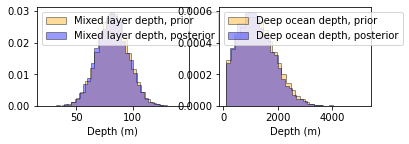

In [24]:
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax1.set_xlabel('Depth (m)')

# sns.distplot(F[253, 0, constrained_2], label='CO2 forcing, constrained')
ax1.hist(Cml*10, histtype='stepfilled', density=True, bins=30, alpha=0.4, ec='k', color='orange', label='Mixed layer depth, prior')
ax1.hist(Cml_constrained*10, label='Mixed layer depth, posterior', histtype='stepfilled', density=True, bins=30, alpha=0.4, ec='k', color='blue')
ax2 = fig.add_subplot(222)
ax2.hist(Cdeep*10, histtype='stepfilled', density=True, bins=30, alpha=0.4, ec='k', color='orange', label='Deep ocean depth, prior')
ax2.hist(Cdeep_constrained*10, histtype='stepfilled', density=True, bins=30, alpha=0.4, ec='k', color='blue', label='Deep ocean depth, posterior')
ax2.set_xlabel('Depth (m)')

ax1.legend(loc='upper left')
ax2.legend(loc='upper left');
#plt.savefig('../FAIR-master/Figures/Ocean_depth.png', bbox_inches='tight');

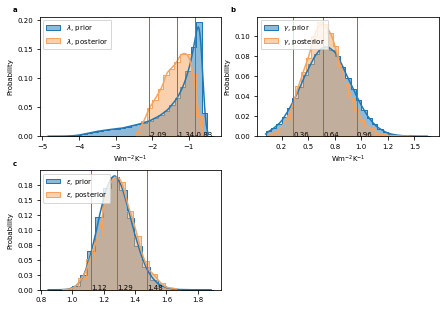

In [65]:
# do the same for feedback parameters

plt.rcParams['figure.figsize'] = (6.09,4.2)
plt.rcParams.update({'font.size': 7})

percentile = [5, 50, 95]

fig = plt.figure()

ax1 = fig.add_subplot(221)
sns.histplot(x=-1*lam, stat='probability', kde=True, binwidth=0.15, element='step', alpha=0.5, label='$\lambda$, prior')
sns.histplot(x=-1*lam_constrained, stat='probability', kde=True, binwidth=0.15, element='step', color='sandybrown', alpha=0.5, label='$\lambda$, posterior')

ax2 = fig.add_subplot(222)
sns.histplot(x=gam, stat='probability', kde=True, binwidth=0.05, element='step', alpha=0.5, label='$\gamma$, prior')
sns.histplot(x=gam_constrained, stat='probability', kde=True, binwidth=0.05, element='step', color='sandybrown', alpha=0.5, label='$\gamma$, posterior')
ax2.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))

ax3 = fig.add_subplot(223)
sns.histplot(x=eps, stat='probability', kde=True, binwidth=0.05, element='step', alpha=0.5, label='$\epsilon$, prior')
sns.histplot(x=eps_constrained, stat='probability', kde=True, binwidth=0.05, element='step', color='sandybrown', alpha=0.5, label='$\epsilon$, posterior')
ax3.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
percentile = [5, 50, 95]
    
for percent in percentile:

    ax1.axvline(x=np.percentile(-1*lam_constrained, percent), linewidth=1, color='orangered')  
    ax1.annotate(text=np.round(-1*np.percentile(lam_constrained, percent),2), xy=(-1*np.percentile(lam_constrained, percent), 0))
    
    ax2.axvline(x=np.percentile(gam_constrained, percent), linewidth=1, color='orangered')
    ax2.annotate(text=np.round(np.percentile(gam_constrained, percent),2), xy=(np.percentile(gam_constrained, percent), 0))

    ax3.axvline(x=np.percentile(eps_constrained, percent), linewidth=1, color='orangered')
    ax3.annotate(text=np.round(np.percentile(eps_constrained, percent),2), xy=(np.percentile(eps_constrained, percent), 0))


ax1.legend(loc='upper left')
ax2.legend(loc='upper left')
ax3.legend(loc='upper left')

ax1.set_xlabel('Wm$^{-2}$K$^{-1}$')
ax2.set_xlabel('Wm$^{-2}$K$^{-1}$')

ax1.text(-0.15, 1.04, 'a', transform=ax1.transAxes, 
            size=7, weight='bold')
ax2.text(-0.15, 1.04, 'b', transform=ax2.transAxes, 
            size=7, weight='bold')
ax3.text(-0.15, 1.04, 'c', transform=ax3.transAxes, 
            size=7, weight='bold')
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=-0.5)
plt.savefig('../FAIR-master/remote_runs_NOx/Figures/Small_figures/Free_vars_FigureE5.pdf');

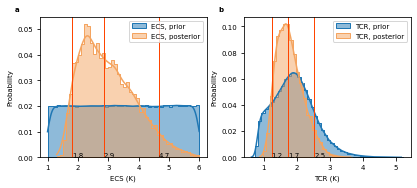

In [30]:
plt.rcParams['figure.figsize'] = (5.7,4.4)
plt.rcParams.update({'font.size': 7})

fig = plt.figure()

percentile = [5, 50, 95]

ax1 = fig.add_subplot(221)
sns.histplot(x=ECS, stat='probability', kde=True, binwidth=0.1, element='step', alpha=0.5, label='ECS, prior')
sns.histplot(x=ECS_constrained, stat='probability', kde=True, binwidth=0.1, element='step', color='sandybrown', alpha=0.5, label='ECS, posterior')
ax1.set_xlabel('ECS (K)')

ax2 = fig.add_subplot(222)
sns.histplot(x=TCR, stat='probability', kde=True, binwidth=0.1, element='step', alpha=0.5, label='TCR, prior')
sns.histplot(x=TCR_constrained, stat='probability', kde=True, binwidth=0.1, element='step', alpha=0.5, color='sandybrown', label='TCR, posterior')
ax2.set_xlabel('TCR (K)')

for percent in percentile:

    ax1.axvline(x=np.percentile(ECS_constrained, percent), linewidth=1, color='orangered')  
    ax1.annotate(text=np.round(np.percentile(ECS_constrained, percent),1), xy=(np.percentile(ECS_constrained, percent), 0))
    
    ax2.axvline(x=np.percentile(TCR_constrained, percent), linewidth=1, color='orangered')
    ax2.annotate(text=np.round(np.percentile(TCR_constrained, percent),1), xy=(np.percentile(TCR_constrained, percent), 0))


ax1.legend()
ax2.legend()

ax1.text(-0.15, 1.04, 'a', transform=ax1.transAxes, 
            size=7, weight='bold')
ax2.text(-0.15, 1.04, 'b', transform=ax2.transAxes, 
            size=7, weight='bold')
plt.tight_layout(pad=0.5, w_pad=0.6, h_pad=-0.5)
plt.savefig('../FAIR-master/remote_runs_NOx/Figures/Small_figures/ECSTCR_FigureE6.pdf');

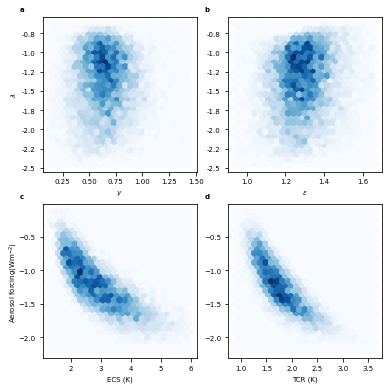

In [68]:
array = np.ndarray((nc, 6))
array[:,0] = -1*lam_constrained
array[:,1] = gam_constrained
array[:,2] = eps_constrained
array[:,3] = ECS_constrained
array[:,4] = TCR_constrained
array[:,5] = F_constrained[253, 8, :]

df = pd.DataFrame(array, columns=['Lambda', 'Gamma', 'Epsilon', 'ECS (K)', 'TCR (K)', 'Aerosol forcing (W m$^-2$)'])

fig = plt.figure(figsize=(5.3,5.3))
plt.rcParams.update({'font.size': 7})

ax1 = fig.add_subplot(221)
plt.hexbin(y="Lambda", x="Gamma", data=df, cmap='Blues', gridsize=(25,15))
ax1.set_ylabel('$\lambda$')
ax1.set_xlabel('$\gamma$')
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

ax2 = fig.add_subplot(222)
plt.hexbin(y="Lambda", x="Epsilon", data=df, cmap='Blues', gridsize=(25,15))
#ax2.set_ylabel('$\lambda$')
ax2.set_xlabel('$\epsilon$')
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

ax3 = fig.add_subplot(223)
plt.hexbin(x="ECS (K)", y="Aerosol forcing (W m$^-2$)", data=df, cmap='Blues', gridsize=(25,15))
ax3.set_xlabel('ECS (K)')
ax3.set_ylabel('Aerosol forcing(Wm$^{-2}$)', labelpad=-1)

ax4 = fig.add_subplot(224)
plt.hexbin(x="TCR (K)", y="Aerosol forcing (W m$^-2$)", data=df, cmap='Blues', gridsize=(25,15))
ax4.set_xlabel('TCR (K)')
#ax4.set_ylabel('Aerosol forcing(Wm$^{-2}$)', labelpad=-1);
ax1.text(-0.15, 1.04, 'a', transform=ax1.transAxes, 
            size=7, weight='bold')
ax2.text(-0.15, 1.04, 'b', transform=ax2.transAxes, 
            size=7, weight='bold')

ax3.text(-0.15, 1.04, 'c', transform=ax3.transAxes, 
            size=7, weight='bold')
ax4.text(-0.15, 1.04, 'd', transform=ax4.transAxes, 
            size=7, weight='bold')
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=-0.5)
plt.savefig('../FAIR-master/remote_runs_NOx/Figures/Small_figures/gam_lam_scatter.pdf');

In [40]:
r0 = stats.norm.rvs(size=100000, loc=33.8, scale=3.38, random_state=41000)
rc = stats.norm.rvs(size=100000, loc=0.019, scale=0.0019, random_state=42000)
rt = stats.norm.rvs(size=100000, loc=4.165, scale=0.4165, random_state=45000)

r0_constrained = np.load('remote_runs_NOx/r0_post.npy')
rc_constrained = np.load('remote_runs_NOx/rc_post.npy')
rt_constrained = np.load('remote_runs_NOx/rt_post.npy')

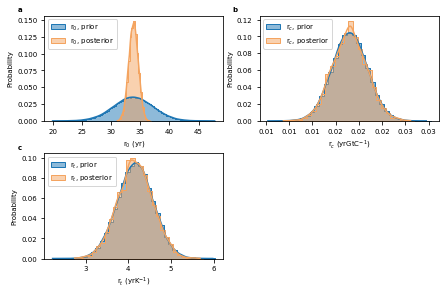

In [59]:
# check carbon cycle parameters

plt.rcParams['figure.figsize'] = (6.09,4.)
plt.rcParams.update({'font.size': 7})

fig = plt.figure()

ax1 = fig.add_subplot(221)
sns.histplot(x=r0, stat='probability', kde=True, binwidth=0.3, element='step', alpha=0.5, label='r$_{0}$, prior')
sns.histplot(x=r0_constrained, stat='probability', kde=True, binwidth=0.3, element='step', color='sandybrown', alpha=0.5, label='r$_0$, posterior')
ax1.set_xlabel('r$_0$ (yr)')

ax2 = fig.add_subplot(222)
sns.histplot(x=rc, stat='probability', kde=True, binwidth=0.0005, element='step', alpha=0.5, label='r$_{c}$, prior')
sns.histplot(x=rc_constrained, stat='probability', kde=True, binwidth=0.0005, element='step', color='sandybrown', alpha=0.5, label='r$_c$, posterior')
ax2.set_xlabel('r$_c$ (yrGtC$^{-1}$)')
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax2.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))



ax3 = fig.add_subplot(223)
sns.histplot(x=rt, stat='probability', kde=True, binwidth=0.1, element='step', alpha=0.5, label='r$_t$, prior')
sns.histplot(x=rt_constrained, stat='probability', kde=True, binwidth=0.1, element='step', color='sandybrown', alpha=0.5, label='r$_t$, posterior')
ax3.set_xlabel('r$_t$ (yrK$^{-1}$)')
ax3.legend(loc='upper left')

ax1.text(-0.15, 1.04, 'a', transform=ax1.transAxes, 
            size=7, weight='bold')
ax2.text(-0.15, 1.04, 'b', transform=ax2.transAxes, 
            size=7, weight='bold')
ax3.text(-0.15, 1.04, 'c', transform=ax3.transAxes, 
            size=7, weight='bold')
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=-0.5)
plt.savefig('../FAIR-master/remote_runs_NOx/Figures/Small_figures/carbon_cycle_FigureE7.pdf');